# Import Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
import random

# Data Pre-Processing

In [2]:
train_data=np.load("X_train.npy")
label_data=np.load("Y_train.npy")
test_data=np.load("X_test.npy")

In [3]:
train_data.shape

(4160, 50, 50, 3)

In [4]:
label_data.shape

(4160,)

In [5]:
train_data=train_data.reshape(len(train_data),50,50,3)
train_data=train_data/255

test_data=test_data.reshape(len(test_data),50,50,3)
test_data=test_data/255

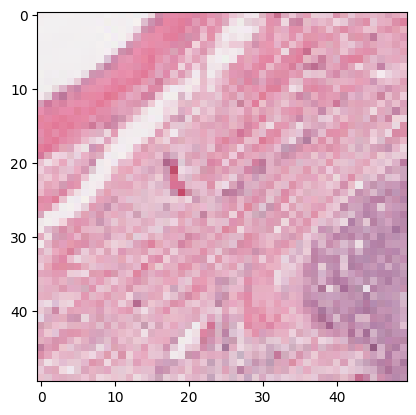

In [6]:
idx=random.randint(0,len(train_data))
plt.imshow(train_data[idx,:])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split


# Splitting data into train and combined test+dev sets (60% train, 40% test+dev)
train_data, X_test_dev, label_data, y_test_dev = train_test_split(train_data, label_data, test_size=0.3, random_state=42)

# Splitting combined test+dev data into test and dev sets (50% test, 50% dev)
X_test, X_dev, y_test, y_dev = train_test_split(X_test_dev, y_test_dev, test_size=0.5, random_state=42)

# Check shapes of training data
print("Training data shape - X_train:", train_data.shape, "y_train:", label_data.shape)

# Check shapes of testing data
print("Testing data shape - X_test:", X_test.shape, "y_test:", y_test.shape)

# Check shapes of validation data
print("Validation data shape - X_dev:", X_dev.shape, "y_dev:", y_dev.shape)

Training data shape - X_train: (2912, 50, 50, 3) y_train: (2912,)
Testing data shape - X_test: (624, 50, 50, 3) y_test: (624,)
Validation data shape - X_dev: (624, 50, 50, 3) y_dev: (624,)


# Model Training Using Convolutional Neural Network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


In [9]:
model_x = Sequential()

model_x.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(50,50,3)))
# model_x.add(BatchNormalization())
model_x.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model_x.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
# model_x.add(BatchNormalization())
model_x.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model_x.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
# model_x.add(BatchNormalization())
model_x.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# model_x.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu'))
# model_x.add(BatchNormalization())
# model_x.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model_x.add(Flatten())

# model_x.add(Dense(128, activation='relu'))
# model_x.add(Dropout(0.2))
model_x.add(Dense(64, activation='relu'))
model_x.add(Dropout(0.2))
model_x.add(Dense(32, activation='relu'))
model_x.add(Dropout(0.2))
model_x.add(Dense(1, activation='sigmoid'))

In [10]:
model_x.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [11]:
history = model_x.fit(train_data, label_data, epochs=20, validation_data=(X_dev, y_dev), callbacks = [early_stopping])


Epoch 1/20


91/91 [==============================] - 7s 42ms/step - loss: 0.6746 - accuracy: 0.5917 - val_loss: 0.6307 - val_accuracy: 0.6907
Epoch 2/20
91/91 [==============================] - 3s 35ms/step - loss: 0.5987 - accuracy: 0.7102 - val_loss: 0.5690 - val_accuracy: 0.7212
Epoch 3/20
91/91 [==============================] - 3s 34ms/step - loss: 0.5826 - accuracy: 0.7109 - val_loss: 0.5428 - val_accuracy: 0.7308
Epoch 4/20
91/91 [==============================] - 3s 34ms/step - loss: 0.5523 - accuracy: 0.7349 - val_loss: 0.5338 - val_accuracy: 0.7500
Epoch 5/20
91/91 [==============================] - 3s 33ms/step - loss: 0.5472 - accuracy: 0.7366 - val_loss: 0.5835 - val_accuracy: 0.7308
Epoch 6/20
91/91 [==============================] - 3s 35ms/step - loss: 0.5612 - accuracy: 0.7335 - val_loss: 0.5529 - val_accuracy: 0.7356
Epoch 7/20
91/91 [==============================] - 3s 36ms/step - loss: 0.5424 - accuracy: 0.7394 - val_loss: 0.5249 - val_accuracy: 0.7436
Epoch 8/20


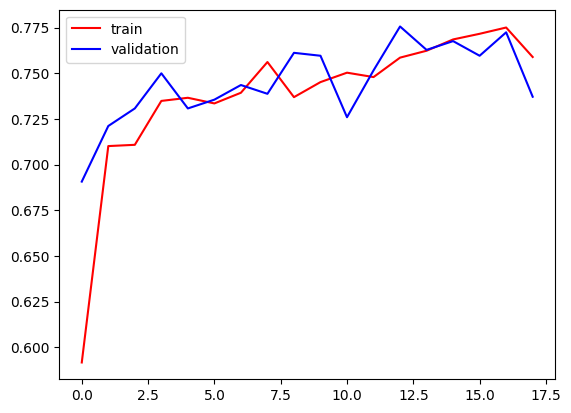

In [21]:
# Training graph for accuracy

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [12]:
# model1=Sequential([
#     Conv2D(32,(3,3),activation ='relu',input_shape=(50,50,3)), #LayerType(no. of filters, (size of the filter), activation,input shape)
#     MaxPooling2D((2,2)),
#     Conv2D(32, (3,3), activation ='relu'),
#     MaxPooling2D((2,2)),
#     Flatten(),
#     Dense(64,activation ='relu'),
#     Dense(1, activation ='sigmoid')
# ])

In [13]:
# # opt=keras.optimizers.legacy.SGD(learning_rate=0.001) #this line is used for specifying the learning rate.
# model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
# model1.fit(train_data, label_data, epochs=20, batch_size=32, validation_data=(X_dev, y_dev), callbacks = [early_stopping])

# CNN Model Evaluation 

In [15]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model_x.evaluate(X_test, y_test)

# Print the test accuracy
print("Test accuracy:", test_accuracy)

20/20 [==============================] - 0s 17ms/step - loss: 0.4825 - accuracy: 0.7788
Test accuracy: 0.7788461446762085


In [22]:
# stop here

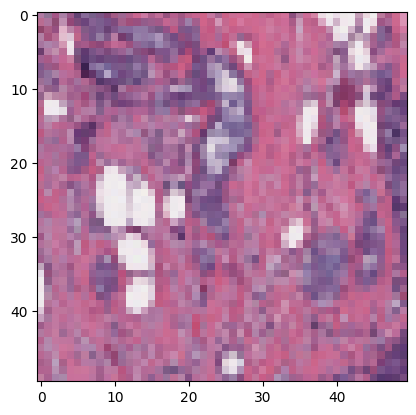

1/1 [==============================] - 0s 47ms/step
Our Model Says the Breast Cancer is:  malignant
And according to trained data's label dataset it is:  malignant


In [19]:
idx2=random.randint(0,len(X_test))
plt.imshow(X_test[idx2,:])
plt.show()

label_test_data=model_x.predict(X_test[idx2,:].reshape(1,50,50,3))
label_test_data=label_test_data>0.5

if(label_test_data==0):
    pred1='benign'
else:
    pred1='malignant'

label_data_value=y_test[idx2]

if(label_data_value==0):
    pred2='benign'
else:
    pred2='malignant'
    
    
print("Our Model Says the Breast Cancer is: ", pred1)
print("And according to trained data's label dataset it is: ", pred2)

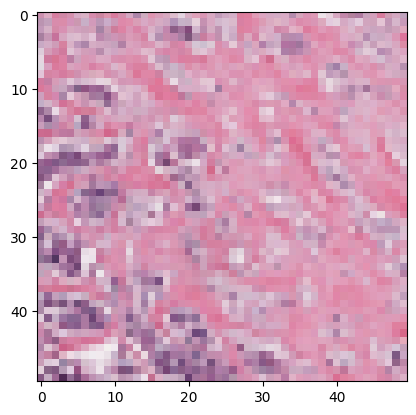

1/1 [==============================] - 0s 57ms/step
Our Model Says the Breast Cancer is:  benign


In [20]:
idx3=random.randint(0,len(test_data))
plt.imshow(test_data[idx3,:])
plt.show()

label_test_data=model_x.predict(test_data[idx3,:].reshape(1,50,50,3))
label_test_data=label_test_data>0.5

if(label_test_data==0):
    pred3='benign'
else:
    pred3='malignant'
    
print("Our Model Says the Breast Cancer is: ", pred3)

### Converting to csv

In [58]:
import pandas as pd

# Predict output values for test data
predictions = model_x.predict(test_data)

# Convert numerical predictions to categorical labels
labels = ['malignant' if output > 0.5 else 'benign' for output in predictions]

# Prepare data for CSV
data = {'Image': [f'image{i+1}' for i in range(len(predictions))],
        'Output': labels}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('test_set_predictions_cnn.csv', index=False)

44/44 [==============================] - 1s 13ms/step


# Model Training Using SVM

In [23]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [24]:
train_data_flat = train_data.reshape(len(train_data), -1)
test_data_flat = test_data.reshape(len(test_data), -1)

In [25]:
scaler = StandardScaler()
train_scaled_data = scaler.fit_transform(train_data_flat)
test_scaled_data = scaler.transform(test_data_flat)  

In [26]:
model2 = SVC(kernel="rbf")  
model2.fit(train_scaled_data, label_data)

SVC()

In [27]:
train_pred_svm=model2.predict(train_scaled_data)

In [28]:
accuracy_svm= accuracy_score(label_data, train_pred_svm)
print("Accuracy:", accuracy_svm)

Accuracy: 0.8835851648351648


In [32]:
def accuracy_svm_model(X,Y):
    data_flat = X.reshape(len(X), -1)
    scaled_data = scaler.transform(data_flat) 
    pred_svm=model2.predict(scaled_data)
    accuracy_model= accuracy_score(Y, pred_svm)
    return accuracy_model

In [34]:
# Accuracy on dev set
print('Accuracy of model on dev set:', accuracy_svm_model(X_dev, y_dev))

Accuracy of model on dev set: 0.7756410256410257


In [35]:
# Accuracy on test set
print('Accuracy of model on dev set:', accuracy_svm_model(X_test, y_test))

Accuracy of model on dev set: 0.7644230769230769


### Converting to csv

In [57]:
# Predict output values for test data
predictions_2 = model2.predict(test_scaled_data)

# Convert numerical predictions to categorical labels
labels_2 = ['malignant' if output > 0.5 else 'benign' for output in predictions]

# Prepare data for CSV
data_2 = {'Image': [f'image{i+1}' for i in range(len(predictions))],
        'Output': labels}

# Create DataFrame
df_2 = pd.DataFrame(data)

# Save DataFrame to CSV
df_2.to_csv('test_set_predictions_svm.csv', index=False)

# Model Training Using to MLP

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
model3 = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(50,50,3)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])

model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model3.fit(train_data, label_data, epochs=20, batch_size=32, validation_data=(X_dev, y_dev))

Epoch 1/20
91/91 [==============================] - 3s 18ms/step - loss: 1.1485 - accuracy: 0.5656 - val_loss: 0.6652 - val_accuracy: 0.5801
Epoch 2/20
91/91 [==============================] - 2s 18ms/step - loss: 0.6582 - accuracy: 0.6302 - val_loss: 0.6904 - val_accuracy: 0.5929
Epoch 3/20
91/91 [==============================] - 2s 18ms/step - loss: 0.5963 - accuracy: 0.6947 - val_loss: 0.7539 - val_accuracy: 0.5288
Epoch 4/20
91/91 [==============================] - 2s 19ms/step - loss: 0.6241 - accuracy: 0.6617 - val_loss: 0.6187 - val_accuracy: 0.6266
Epoch 5/20
91/91 [==============================] - 1s 12ms/step - loss: 0.6236 - accuracy: 0.6648 - val_loss: 0.5785 - val_accuracy: 0.7163
Epoch 6/20
91/91 [==============================] - 1s 8ms/step - loss: 0.5755 - accuracy: 0.7012 - val_loss: 0.5408 - val_accuracy: 0.7564
Epoch 7/20
91/91 [==============================] - 1s 8ms/step - loss: 0.6360 - accuracy: 0.6707 - val_loss: 0.5545 - val_accuracy: 0.7212
Epoch 8/20
91/9

# MLP Model Evaluation

In [43]:
train_pred_mlp_data=model3.predict(train_data)
val_pred_mlp_data=model3.predict(X_dev)
test_pred_mlp_data=model3.predict(X_test)

20/20 [==============================] - 0s 5ms/step


In [46]:
# Evaluate the model on the validation and testing set
val_loss, val_accuracy = model3.evaluate(X_dev, y_dev)
test_loss, test_accuracy = model3.evaluate(X_test, y_test)

# Print the test accuracy
print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)

20/20 [==============================] - 0s 5ms/step - loss: 0.5266 - accuracy: 0.7420
Validation accuracy: 0.7355769276618958
Test accuracy: 0.7419871687889099


### Converting to csv

In [55]:
# Predict probabilities for test data
predictions_3 = model3.predict(test_data)

# Convert numerical predictions to categorical labels
labels_3 = ['malignant' if pred > 0.5 else 'benign' for pred in predictions]

# Prepare data for CSV
data_3 = {'Image': [f'image{i+1}' for i in range(len(predictions))],
        'Output': labels}

# Create DataFrame
df_3 = pd.DataFrame(data)

# Save DataFrame to CSV
df_3.to_csv('test_set_predictions_mlp.csv', index=False)

44/44 [==============================] - 0s 5ms/step
